<center><font size='6px' color='#DC143C'><b>Classification des Tweets </b></font>

<div style="font-size: 23px;font-family: Times New Roman;color: DarkRed"><em><strong>Introduction</strong></em></div>

<p style="font-size: 18px;font-family: Times New Roman">Dans nos jours, avec l'explosion du Big Data, il existe une forte demande pour les organisations et les scientifiques des données pour effectuer l'extraction d'informations à l'aide de sources de données non traditionnelles. Des recherches ont montré que près de 80% des données existent sous forme de données textuelles non structurées, par conséquent, l'analyse de texte est fondamentale pour analyser la richesse des informations disponibles sur les transcriptions de chat, les publications sur les réseaux sociaux, les critiques, les fils d'actualité, etc.

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>objectifs: </strong></p>

<ul>
  <li>Maitriser l’API de twitter pour l’extraction des tweets</li>
  <li>Maitriser la partie NLP (natural language processing) avec NLTK en Python</li>
  <li>Appliquer les principes de nettoyage des données</li>
  <li>Classer les tweets : regrouper ensemble les tweets qui sont similaires.</li>
</ul>   

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>Téléchargements des Tweets: 

<p style="font-size: 17px;font-family: Times New Roman">Tweepy :Bibliothèque Python qui permet d’utiliser une API Twitter pour streamer les tweets

In [6]:
!pip install tweepy

<p style="font-size: 17px;font-family: Times New Roman">pour obtenir les tokens

<p style="font-size: 17px;font-family: Times New Roman">Pour pouvoir utiliser les APIs REST de Twitter et de streamer les tweets , il  faudra d’abord suivre une procédure de création d’une App. Twitter vous demandera notamment de renseigner à quelles fins vous souhaitez utiliser leurs services, et, si tout va bien, cela permet de récupérer 4 clés secrètes (tokens API ).

<p style="font-size: 17px;font-family: Times New Roman">on commence par stocker nos clés et nos jetons dans des variables

In [ ]:
# Twitter Api Credentials
consumerKey = 'fcjgxnytKKObdwX2tpbUaQKyp'
consumerSecret = '5KGVQ5EBFPFWEmTWkIU4JVFWjbAQADwNSzy6BNrTL6zqKjhGPS'
accessToken = '1334857459471626242-ybUmn2t1OlhKeczeP61vJwRTDGwqMv'
accessTokenSecret = 'hAJQ22ww9ClI704vvTtouQ32ZXu1Dg0EdgdYnY2xHhMGD'

<p style="font-size: 17px;font-family: Times New Roman">On peut s'authentifier maintenant à l'aide de nos jetons

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

Une fois authentifié, il suffit de choisir n'importe quel sujet qu'on veut rechercher sur Twitter pour voir ce que les gens tweetent dans le contexte de ce sujet.

j'ai choisi le mot "diet", pour voir ce sur quoi les gens tweetent dans ce contexte:

In [ ]:
for tweet in api.search('diet'):
    print(tweet.text)
api.searchgenera

<ul>
    <li>numpy : permet d’effectuer des calculs numériques avec Python. Elle introduit une gestion facilitée des tableaux de nombres.</li>
<li>matplotlib.pyplot : est une collection de fonctions qui font fonctionner matplotlib comme MATLAB. Chaque fonction pyplot modifie une figure: par exemple, crée une figure, crée une zone de traçage dans une figure, trace des lignes dans une zone de traçage, décore le tracé avec des étiquettes, etc.</li>
<li>pandas : Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles.</li>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
tweet_df_all = pd.read_csv('blank1.csv')


In [110]:
tweet_df_all = tweet_df_all[tweet_df_all['text'].notna()]

#### Jetons un œil à l'ensemble de données ci-dessous .

In [111]:
print(tweet_df_all.shape)
tweet_df_all.head()

(10169, 4)


,twitter_id,name,created_at,text
0,1339988745387466760,Finances_King,12/18/20,'New: Amazon's BWI airport facility has bays f...
1,1339988764504911872,KillaDot_,12/18/20,'@MrsGriffin_30 It is. Dogs and cats actually ...
2,1339988778568609798,PeterKewley,12/18/20,'@jasona1980 Remember when we suppose to go on...
3,1339988782964064257,life_she_wrote,12/18/20,'@isierranichole Oof girl I feel this. I’m ove...
4,1339988803457589250,ceejypeejy,12/18/20,'@TheIndigoDingo I'm on day four of trying to ...


In [112]:
tweet_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   twitter_id  10169 non-null  object
 1   name        10169 non-null  object
 2   created_at  10169 non-null  object
 3   text        10169 non-null  object
dtypes: object(4)
memory usage: 397.2+ KB


#### Vérifions s'il y a des valeurs manquentes

In [113]:
missing = tweet_df_all.isna().sum()
print(missing)

twitter_id    0
name          0
created_at    0
text          0
dtype: int64


<h3 style = "color:DarkCyan;">I. Prétraitement des tweets</h3>

<p>Dans cette étape, l’objectif est de rendre le texte des tweets miniscule et d’éliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url, … qui sont des données unitiles.

<p>dans cette etape on va commencer par rendre tous en miniscule.

In [114]:
tweet_df_all['text'] = tweet_df_all['text'].str.lower()

### Nettoyage : 
<p>notre texte contient beaucoup de caractères qui ne seront significatifs pour aucun algorithme de machine learning ,on peut voir ci-dessus en regardant simplement les premières lignes des données que les tweets contiennent des caractères tels que #, @ et des signes de ponctuation.
cette phase consiste à réaliser des tâches telles que la suppression d’urls, d’emoji, etc.<p>

In [115]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

#### on peut visulaliser les données après les données aprés avoir faire le nettoyage

In [116]:
tweets_clean = clean_text(tweet_df_all, 'text')
tweets_clean.head()

,twitter_id,name,created_at,text
0,1339988745387466760,Finances_King,12/18/20,new amazons bwi airport facility has bays for ...
1,1339988764504911872,KillaDot_,12/18/20,30 it is dogs and cats actually thrive better ...
2,1339988778568609798,PeterKewley,12/18/20,remember when we suppose to go on the course ...
3,1339988782964064257,life_she_wrote,12/18/20,oof girl i feel this im over the mindfck that...
4,1339988803457589250,ceejypeejy,12/18/20,im on day four of trying to eat better but i ...


####  on va mettre la nouvelle DataSet qui est nettoyée dans un nouveau fichier csv

In [117]:
clean_tweet=tweets_clean.to_csv('tweetscleaned.csv')

In [118]:
tweets = pd.read_csv('tweetscleaned.csv')

<h3 style = "color:DarkCyan;">II. Traitement des tweets : NLP (Natural LanguageProcessing)<h3>

<p>Le Natural LanguageProcessing se base sur l'analyse humaine. Cela impliquait de coder manuellement des ensembles de règles pour amener les machines à «apprendre» des modèles de langage. Aujourd'hui, la NLP s'appuie sur des algorithmes d'apprentissage automatique pour faire des inférences statistiques à partir de texte. En utilisant ce modèle, plus un ordinateur traite de texte, plus il apprendra de règles linguistiques et plus il sera précis.


Tâches PNL
Il existe plusieurs tâches de traitement du langage naturel qui se concentrent sur la dissection et l'extraction du sens d'un attribut de langage particulier. Voici quelques exemples de tâches NLP:
<ul>
    <li>Séparer le texte en phrases, mots et morphèmes</li>
    <li>Marquer des parties du discours</li>
    <li>Trouver la signification de chaque mot dans un contexte donné</li>
    <li>Traduire du texte d'une langue humaine à une autre</li>
    <li>Conversion des informations de la base de données en langage lisible par l'homme</li>
    <li>Répondre aux questions posées dans un langage lisible par l'homme</li>
    <li>Analyser les mots pour le sentiment</li>
    <li>Conversion de la langue parlée en texte écrit</li>
</ul>

### Tokenization :
Tokenization consiste à rendre un morceau de texte en parties plus petites. Qu'il s'agisse de casser le paragraphe en phrases, la phrase en mots ou le mot en caractères.
La tokenisation est une tâche courante dans le traitement du langage naturel (NLP). C'est une étape fondamentale dans les méthodes PNL traditionnelles telles que Count Vectorizer et les architectures basées sur l'apprentissage profond avancé telles que Transformers .

On utilse un tokenizer dédié : TweetTokenizer ou un tokenizer qui prend en compte le langage.

In [119]:
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import en_core_web_sm
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
print(stop)
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
             word = lemmatizer.lemmatize(i)
             final_text.append(word.lower())
    return " " .join(final_text)

{'won', 'your', 'its', 'itself', 'over', 'until', 'few', "hasn't", 'needn', 'wouldn', 'not', 'our', 'after', 'that', 'nor', 'what', 'between', "should've", "you'd", "that'll", 'having', 'hadn', 'who', 'they', 'because', "she's", 'there', 'does', 'aren', 'o', 'before', 'mightn', 'yourselves', 'too', 'yourself', 'him', 'his', 'yours', "won't", 'all', 'an', 'which', 'them', 'both', 'from', 'myself', 's', 'he', 'into', 'weren', 'ourselves', 'with', "mightn't", 'wasn', 'doesn', 'any', 'out', 'where', "shan't", 'than', 'should', 'my', 'or', "isn't", 've', 'through', 'down', 'when', 'hasn', 'ma', 'against', 'such', 'couldn', 'only', 'by', 're', 'off', 'some', 'up', "hadn't", "mustn't", 'at', 't', 'so', 'can', 'herself', 'to', 'once', 'don', 'and', "aren't", "it's", 'for', "you're", 'her', 'haven', 'm', 'the', 'no', 'are', 'this', 'now', 'in', 'same', 'further', 'himself', 'just', 'how', 'be', "you'll", 'was', 'have', 'why', 'own', 'ours', "doesn't", 'as', 'of', 'above', 'mustn', 'been', 'shou

In [120]:
tweets_clean.head()

,twitter_id,name,created_at,text
0,1339988745387466760,Finances_King,12/18/20,new amazons bwi airport facility has bays for ...
1,1339988764504911872,KillaDot_,12/18/20,30 it is dogs and cats actually thrive better ...
2,1339988778568609798,PeterKewley,12/18/20,remember when we suppose to go on the course ...
3,1339988782964064257,life_she_wrote,12/18/20,oof girl i feel this im over the mindfck that...
4,1339988803457589250,ceejypeejy,12/18/20,im on day four of trying to eat better but i ...


In [121]:
tweets_clean.sample(5)

,twitter_id,name,created_at,text
2867,1340025329075838978,DeadLiftCapital,12/18/20,folksy old guy from omaha who drinks diet co...
9574,1340102173200289793,EuropeanRevolt,12/19/20,rt what diet do you eat why
8000,1340080906820755456,Jaysway4,12/18/20,rt citizens ask if the state media alliance i...
350,1339994021402271745,AilurosSky,12/18/20,todo18 dont forget the supplements though i re...
5889,1340059314136915970,Hustle834,12/18/20,rt tones eating coochie does assist in a lot o...


<p>on va écrire également notre fonction d''analyse' de sentiment:

In [122]:
from textblob import TextBlob
import re
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [123]:
# We create a column with the result of the analysis:
tweets_clean['SA'] = np.array([ analyze_sentiment(tweet) for tweet in tweets_clean['text'] ])

# We display the updated dataframe with the new column:
display(tweets_clean.head(10))

,twitter_id,name,created_at,text,SA
0,1339988745387466760,Finances_King,12/18/20,new amazons bwi airport facility has bays for ...,Positive
1,1339988764504911872,KillaDot_,12/18/20,30 it is dogs and cats actually thrive better ...,Positive
2,1339988778568609798,PeterKewley,12/18/20,remember when we suppose to go on the course ...,Neutral
3,1339988782964064257,life_she_wrote,12/18/20,oof girl i feel this im over the mindfck that...,Neutral
4,1339988803457589250,ceejypeejy,12/18/20,im on day four of trying to eat better but i ...,Positive
5,1339988822562488320,Natedude4,12/18/20,and half of you were on the nacho diet for ove...,Negative
6,1339988833081823233,ndnhotgirl,12/18/20,not a white girl trying to tell us about our a...,Neutral
7,1339988839499091968,Caligeorgeee1,12/18/20,rt the good advises plenty of water a balan...,Positive
8,1339988853982023687,funcooker123,12/18/20,rt with the help of i want to reward a fan ...,Neutral
9,1339988894352367619,Movie_Plot_Bot,12/18/20,in a shocking flick presented by nick at night...,Negative


In [124]:
pos_tweets = [ tweet for index,tweet in enumerate(tweets_clean['text']) if tweets_clean['SA'][index]=='Positive']
neu_tweets = [ tweet for index,tweet in enumerate(tweets_clean['text']) if tweets_clean['SA'][index] == 'Neutral']
neg_tweets = [ tweet for index,tweet in enumerate(tweets_clean['text']) if tweets_clean['SA'][index]=='Negative']

In [125]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(tweets_clean['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(tweets_clean['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(tweets_clean['text'])))

Percentage of positive tweets: 51.420985347625134%
Percentage of neutral tweets: 34.84118399055954%
Percentage de negative tweets: 13.737830661815321%


In [126]:
positive=tweets_clean.loc[tweets_clean.SA=='Positive','text'].count()
negative=tweets_clean.loc[tweets_clean.SA=='Neutral','text'].count()
neutral=tweets_clean.loc[tweets_clean.SA=='Negative','text'].count()

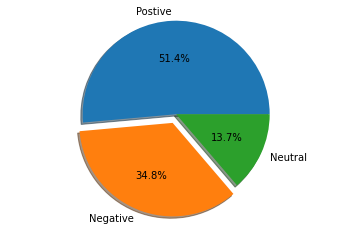

In [127]:
#plot
labels='Postive', 'Negative', 'Neutral'
sizes=[positive,negative, neutral]
explode=(0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

In [44]:
tweets_clean['Sentiment'] = tweets_clean['text'].apply(lambda x: analyze_sentiment(x))

Dans cette étape on va s'interesser à la distribution des sentiments de tous les tweets (la plupart des tweets ont-ils un contexte positif, négatif ou neutre?).

In [56]:
import matplotlib.pyplot as plt
tweets_clean['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',yTitle='Count', title='Overall Sentiment Distribution')

#### Vérifions les mots les plus fréquemment utilisés

Pour visualiser les mots les plus fréquemment utilisés, on utilise un  word cloud, ce qui est un excellent moyen de faire une telle tâche. Les  word cloud nous donnent une image montrant tous les mots utilisés dans un morceau de texte dans différentes tailles où les mots affichés dans de plus grandes tailles sont utilisés plus fréquemment.

In [ ]:
allWords = ' '.join([twts for twts in tweets_clean['text']])

### WordCloud :
WordCloud est une technique pour montrer quels mots sont les plus fréquents parmi le dataset.

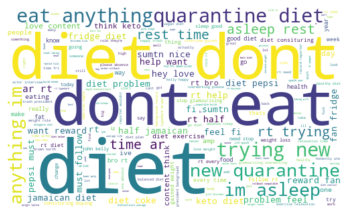

In [128]:
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110,background_color="white").generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:>

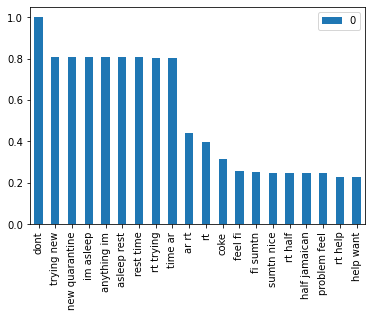

In [129]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()

<h3 style = "color:DarkCyan;">III. Classification des tweets<h3>

<p>K-means est un algorithme de clustering de données non supervisé classique. En un mot, K-means utilise k centroïdes (points qui sont le centre d'un cluster) pour définir les clusters. Un point de données est considéré comme faisant partie d'un cluster particulier s'il est plus proche du centre de gravité de ce cluster que de tout autre centre de gravité

TF-IDF est l'abréviation de Term Frequency Inverse Document Frequency. Il s'agit d'un algorithme très courant pour transformer le texte en une représentation significative de nombres qui est utilisée pour ajuster l'algorithme de la machine pour la prédiction. 

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(tweets_clean.text)
text = tfidf.transform(tweets_clean.text)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(tweets_clean.text)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 7623)


In [80]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [82]:
import mglearn
# Print out the 5 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
like          feel          think         thats         coke          
year          nice          keto          melee         content       
really        problem       love          like          love          
life          half          hey           weight        drink         
american      fi            content       healthy       start         
bad           sumtn         youre         lower         pretty        
30            jamaican      consituring   eating        check         
food          people        buying        rollback      cant          
good          ive           want          build         getting       
brown         would         weight        change        keto          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
happ

Recherche de clusters optimaux Le clustering est une opération non supervisée et KMeans nécessite que nous spécifions le nombre de clusters. Une approche simple consiste à tracer le SSE: sum of squared errors pour une plage de tailles de cluster. Nous recherchons le «coude» où l'ESS commence à se stabiliser. MiniBatchKMeans introduit du bruit, j'ai donc augmenté la taille des lots et des init. Malheureusement, la mise en œuvre régulière de Kmeans est trop lente.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


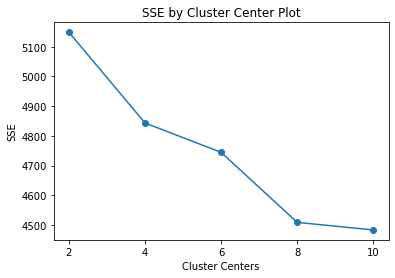

In [83]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [84]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

<p>Dans cette étape on trace les clusters , on trace les clusters générés par  KMeans. Un graphique utilise PCA qui est meilleur pour capturer la structure globale des données. L'autre utilise TSNE qui est meilleur pour capturer les relations entre voisins. Afin d'accélérer le processus avec TSNE, on fait l'échantillonnage sur 3000 tweets et j'effectue d'abord une réduction de dimension PCA 50 sur les données. Ensuite, on montre un nuage de points échantillonnant davantage l'échantillon jusqu'à 300 points.

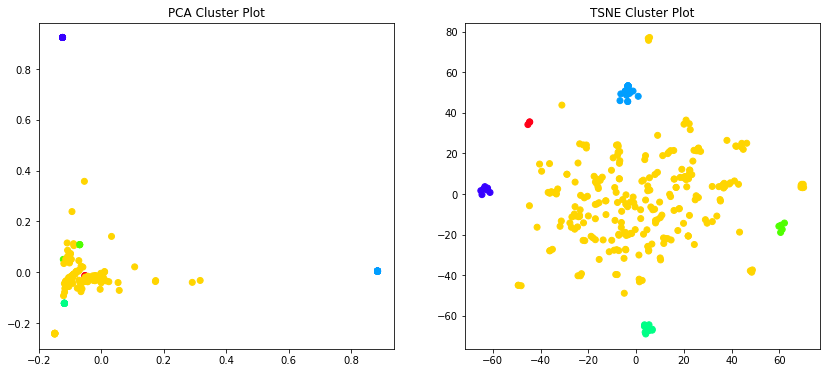

In [85]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

#### Mots clés principaux

 <p>Enfin, on va parcourir les clusters et imprimer les meilleurs mots-clés en fonction de leur score TFIDF pour voir si on peut  recupérer des tendances. en calculant une valeur moyenne pour toutes les dimensions dans Pandas, regroupées par l'étiquette de cluster. En utilisant numpy, trouver les premiers mots consiste simplement à trier les valeurs moyennes de chaque ligne et à prendre le N supérieur.

In [86]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
feed,fed,fine,finally,diet,trying,good,year,week,similar

Cluster 1
need,think,food,keto,weight,coke,like,im,rt,diet

Cluster 2
fi,felt,feeling,feel,figure,zero,diet,plan,rt,bro

Cluster 3
hard,diet,rt,feel,problem,nice,half,fi,jamaican,sumtn

Cluster 4
im,time,eat,dont,new,trying,quarantine,ar,rest,asleep

Cluster 5
fi,diet,rt,want,help,follow,pepsi,fan,fridge,reward

Cluster 6
effect,cheat,strength,diet,fix,vegetarian,mind,blood,business,easily

Cluster 7
fi,felt,feeling,feel,feeding,feed,fighting,keto,rt,diet


### Conclusion:

<p>Dans ce projet j'ai appris à récupérer des informations à partir d'une API twitter et j'ai également appris à gérer les données recuperées , d'analyser ces données et d'extraire des sentiments grâce à Natural Language Processing et dedeterminer des clusters par l'algorithme KMeans

### generation des dependences

In [93]:
!pip install watermark

In [94]:
%load_ext watermark

In [96]:
%watermark --iversions

cufflinks     : 0.17.3
re            : 2.2.1
pandas        : 1.1.3
en_core_web_sm: 2.3.1
mglearn       : 0.1.9
matplotlib    : 3.3.2
numpy         : 1.19.2



In [ ]:
Natural Language Processing 